# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from utils.lexicon.lexicon_memoris import lexicon_memoris, lithology_memoris, pollutant_memoris
from utils.io import boreholes_from_files, gdf_viewer
from core.core import Project
from core.orm import BoreholeOrm, PositionOrm, Base 
import random
from os import remove
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)


## Reading of CSV files in a dir

In [2]:
#df = pd.read_csv('test_data_boreholes.csv', sep=',') # use english lexicon
df = pd.read_csv('test_litho_fr.csv', sep=',') # use french lexicon

## Data Checking

In [3]:
#pol = ['As', 'Ni', 'Cl', 'Hg', 'Pb', 'Zn']
pol = ['VR','VS','VI']
#df[['Pollutant', 'Concentration']] = ''
df[['Pollutant', 'Concentration']] = ''
df['Pollutant'] = df['Pollutant'].apply(lambda x: random.sample(pol, 1)[0])
df['Concentration'] = df['Concentration'].apply(lambda x: np.random.randint(0,100))
df['Unit'] = 'mg/l'

In [4]:
df['Lithology'] = df['Lithology'].replace({'Grès':'Marne', 'Calcaire':'Dolomie'})

In [5]:
df.loc[35.5, :] = ['BH007',152794.0, 121111.0, 60.0, 0.57, 45, 'Calcaire', 'Bleu', 4, 41, 45, 'Cl', 78, 'mg/l']
df.loc[25.5, :] = ['BH005',152473.0, 121460.0, 72.0, 0.61, 32, 'Schiste', 'gris', 3, 29, 32, 'Cl', 78, 'mg/l']
df.drop(index=4, inplace=True)
df.drop(columns='Colour', inplace=True)
df = df.sort_index().reset_index(drop=True)

In [6]:
gdf_viewer(df)

Rows : 996, columns : 13


interactive(children=(IntSlider(value=10, description='rows', max=996, min=10, readout=False), IntSlider(value…

## Create Boreholes from dataframes or files

In [7]:
bhs_df=[df[0:50]] # list of dataframes

In [8]:
boreholes, components, link_intv_comp = boreholes_from_files(bhs_df, verbose=False,
                                                litho_field=['Lithology', 'Pollutant'], 
                                                color_field='Colour', lexicon=lexicon_memoris, 
                                                diam_field='Diameter', thick_field='Thickness')

/home/yanathan/Projects/GSDMA/utils/io.py:469: SAWarning: relationship 'ComponentOrm.intervals' will copy column Components.id to column Linkintervalcomponent.comp_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Components.id to Linkintervalcomponent.comp_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   The 'overlaps' parameter may be used to remove this warning.
  boreholes.append(BoreholeOrm(id=bh_name))
/home/yanathan/Projects/GSDMA/utils/io.py:469: SAWarning: relationship 'ComponentOrm.intervals' will copy column Intervals.id to column Linkintervalcomponent.int_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Intervals.id to


Dataframe 0 processing...
|__ID:'BH001'
{'lithology': 'sable', 'pollutant': 'vs'}
{'lithology': 'argile', 'pollutant': 'vi'}
{'lithology': 'marne', 'pollutant': 'vi'}
{'lithology': 'charbon', 'pollutant': 'vr'}
Summary : [Striplog(4 Intervals, start=0.0, stop=28.0)]
|__ID:'BH002'
{'lithology': 'sable', 'pollutant': 'vi'}
{'lithology': 'argile', 'pollutant': 'vr'}
{'lithology': 'marne', 'pollutant': 'vi'}
{'lithology': 'charbon', 'pollutant': 'vr'}
{'lithology': 'dolomie', 'pollutant': 'vi'}
Summary : [Striplog(5 Intervals, start=0.0, stop=37.0)]
|__ID:'BH003'
{'lithology': 'sable', 'pollutant': 'vr'}
{'lithology': 'argile', 'pollutant': 'vs'}
{'lithology': 'marne', 'pollutant': 'vi'}
{'lithology': 'charbon', 'pollutant': 'vr'}
{'lithology': 'dolomie', 'pollutant': 'vs'}
Summary : [Striplog(5 Intervals, start=0.0, stop=18.0)]
|__ID:'BH004'
{'lithology': 'sable', 'pollutant': 'vs'}
{'lithology': 'argile', 'pollutant': 'vr'}
{'lithology': 'marne', 'pollutant': 'vi'}
{'lithology': 'charbo

In [9]:
boreholes

[<core.orm.BoreholeOrm>(Name=BH001, Length=28.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=32.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=45.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=14.0, Diameter=0.31, Intervals=4)]

In [10]:
components

{0: Component({'lithology': 'marne', 'pollutant': 'vi'}),
 1: Component({'lithology': 'charbon', 'pollutant': 'vr'}),
 2: Component({'lithology': 'sable', 'pollutant': 'vs'}),
 3: Component({'lithology': 'argile', 'pollutant': 'vi'}),
 4: Component({'lithology': 'dolomie', 'pollutant': 'vi'}),
 5: Component({'lithology': 'sable', 'pollutant': 'vi'}),
 6: Component({'lithology': 'argile', 'pollutant': 'vr'}),
 7: Component({'lithology': 'dolomie', 'pollutant': 'vs'}),
 8: Component({'lithology': 'argile', 'pollutant': 'vs'}),
 9: Component({'lithology': 'sable', 'pollutant': 'vr'}),
 10: Component({'lithology': 'charbon', 'pollutant': 'vi'}),
 11: Component({'lithology': 'marne', 'pollutant': 'vr'}),
 12: Component({'lithology': 'charbon', 'pollutant': 'vs'}),
 13: Component({'lithology': 'schiste'}),
 14: Component({'lithology': 'dolomie', 'pollutant': 'vr'}),
 15: Component({'lithology': 'calcaire'}),
 16: Component({'lithology': 'marne', 'pollutant': 'vs'})}

In [11]:
len(boreholes), len(components)

(10, 17)

## Create a project and save data in a database

In [12]:
remove('tmp_files/tfe_orm_db.db')

In [13]:
engine = create_engine('sqlite:///tmp_files/tfe_orm_db.db', echo=True)

In [14]:
Base.metadata.create_all(engine)

2021-07-01 16:11:25,886 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-01 16:11:25,887 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Boreholes")
2021-07-01 16:11:25,887 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-01 16:11:25,888 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Boreholes")
2021-07-01 16:11:25,889 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-01 16:11:25,890 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Positions")
2021-07-01 16:11:25,890 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-01 16:11:25,891 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Positions")
2021-07-01 16:11:25,892 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-01 16:11:25,892 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Intervals")
2021-07-01 16:11:25,893 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-01 16:11:25,894 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Intervals")
2021-07-01 16:11:25,895 INFO sqlalchemy.engine.Engine 

In [15]:
Session = sessionmaker(bind=engine)
session = Session()

In [16]:
p = Project(session, legend_dict={'lithology':lithology_memoris, 'pollutant':pollutant_memoris}, 
            lexicon=lexicon_memoris, repr_attribute='lithology')

p.add_components(components)

2021-07-01 16:11:25,939 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-01 16:11:25,942 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-01 16:11:25,943 INFO sqlalchemy.engine.Engine [generated in 0.00117s] ()
2021-07-01 16:11:25,946 INFO sqlalchemy.engine.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-07-01 16:11:25,947 INFO sqlalchemy.engine.Engine [generated in 0.00064s] ((0, 'Marne, vi'), (1, 'Charbon, vr'), (2, 'Sable, vs'), (3, 'Argile, vi'), (4, 'Dolomie, vi'), (5, 'Sable, vi'), (6, 'Argile, vr'), (7, 'Dolomie, vs')  ... displaying 10 of 17 total bound parameter sets ...  (15, 'Calcaire'), (16, 'Marne, vs'))
2021-07-01 16:11:25,948 INFO sqlalchemy.engine.Engine COMMIT
2021-07-01 16:11:25,952 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-01 16:11:25,953 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "B

Add boreholes into the project

In [17]:
for bh in boreholes:
    p.add_borehole(bh)

2021-07-01 16:11:25,961 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-01 16:11:25,962 INFO sqlalchemy.engine.Engine [generated in 0.00110s] ('BH001', 28.0, 0.43)
2021-07-01 16:11:25,964 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-07-01 16:11:25,964 INFO sqlalchemy.engine.Engine [generated in 0.00057s] ((0, 101.0, 101.0, 101.0, 152600.0, 121039.0), (1, 97.0, 97.0, 97.0, 152600.0, 121039.0), (2, 97.0, 97.0, 97.0, 152600.0, 121039.0), (3, 93.0, 93.0, 93.0, 152600.0, 121039.0), (4, 93.0, 93.0, 93.0, 152600.0, 121039.0), (5, 81.0, 81.0, 81.0, 152600.0, 121039.0), (6, 81.0, 81.0, 81.0, 152600.0, 121039.0), (7, 73.0, 73.0, 73.0, 152600.0, 121039.0))
2021-07-01 16:11:25,966 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-07-01 16:11:25,967 INFO sqlalchemy.engine.Engine

2021-07-01 16:11:26,035 INFO sqlalchemy.engine.Engine [cached since 0.04661s ago] (9,)
2021-07-01 16:11:26,036 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 16:11:26,037 INFO sqlalchemy.engine.Engine [cached since 0.05218s ago] (10,)
2021-07-01 16:11:26,038 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 16:11:26,039 INFO sqlalchemy.engine.Engine [cached since 0.05062s ago] (11,)
2021-07-01 16:11:26,040 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions

2021-07-01 16:11:26,097 INFO sqlalchemy.engine.Engine [cached since 0.1089s ago] (23,)
2021-07-01 16:11:26,099 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 16:11:26,100 INFO sqlalchemy.engine.Engine [cached since 0.1154s ago] (24,)
2021-07-01 16:11:26,102 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 16:11:26,102 INFO sqlalchemy.engine.Engine [cached since 0.1141s ago] (25,)
2021-07-01 16:11:26,104 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-07-01 16:11:26,174 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-07-01 16:11:26,174 INFO sqlalchemy.engine.Engine [cached since 0.1619s ago] (96.0, 'BH004')
2021-07-01 16:11:26,175 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-01 16:11:26,176 INFO sqlalchemy.engine.Engine [cached since 0.215s ago] ('BH005', 32.0, 0.61)
2021-07-01 16:11:26,177 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-07-01 16:11:26,178 INFO sqlalchemy.engine.Engine [cached since 0.214s ago] ((38, 101.0, 101.0, 101.0, 152473.0, 121460.0), (39, 97.0, 97.0, 97.0, 152473.0, 121460.0), (40, 97.0, 97.0, 97.0, 152473.0, 121460.0), (41, 93.0, 93.0, 93.0, 152473.0, 121460.0), (42, 93.0, 93.0, 93.0, 152473.0, 121460.0), (43, 82.0, 82.0, 82.0, 152473.0, 121460.0), (44, 82.0, 82.0, 82.0, 152473.0, 121460.0), (45, 74.0, 74.0, 74.0, 152473.0, 121460.0) 

2021-07-01 16:11:26,236 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-07-01 16:11:26,237 INFO sqlalchemy.engine.Engine [cached since 0.2704s ago] ((25, 'BH006', 0, 'Sable VS', 50, 51), (26, 'BH006', 1, 'Argile VS', 52, 53), (27, 'BH006', 2, 'Marne VI', 54, 55), (28, 'BH006', 3, 'Charbon VI', 56, 57), (29, 'BH006', 4, 'Dolomie VS', 58, 59))
2021-07-01 16:11:26,238 INFO sqlalchemy.engine.Engine COMMIT
2021-07-01 16:11:26,241 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-01 16:11:26,242 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-01 16:11:26,243 INFO sqlalchemy.engine.Engine [cached since 0.301s ago] ()
2021-07-01 16:11:26,246 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "

2021-07-01 16:11:26,298 INFO sqlalchemy.engine.Engine [cached since 0.3134s ago] (60,)
2021-07-01 16:11:26,300 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 16:11:26,300 INFO sqlalchemy.engine.Engine [cached since 0.3122s ago] (61,)
2021-07-01 16:11:26,302 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 16:11:26,303 INFO sqlalchemy.engine.Engine [cached since 0.318s ago] (62,)
2021-07-01 16:11:26,305 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id

2021-07-01 16:11:26,368 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 16:11:26,368 INFO sqlalchemy.engine.Engine [cached since 0.3802s ago] (75,)
2021-07-01 16:11:26,370 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 16:11:26,371 INFO sqlalchemy.engine.Engine [cached since 0.3859s ago] (76,)
2021-07-01 16:11:26,372 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-07-01 16:11:26,429 INFO sqlalchemy.engine.Engine [cached since 0.4409s ago] (89,)
2021-07-01 16:11:26,431 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 16:11:26,432 INFO sqlalchemy.engine.Engine [cached since 0.447s ago] (90,)
2021-07-01 16:11:26,433 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 16:11:26,434 INFO sqlalchemy.engine.Engine [cached since 0.4462s ago] (91,)
2021-07-01 16:11:26,444 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE 

In [18]:
p.add_link_between_components_and_intervals(link_intv_comp)

2021-07-01 16:11:26,495 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-07-01 16:11:26,496 INFO sqlalchemy.engine.Engine [cached since 0.4836s ago] (95.0, 'BH10')
2021-07-01 16:11:26,503 INFO sqlalchemy.engine.Engine INSERT INTO "Linkintervalcomponent" (int_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-07-01 16:11:26,504 INFO sqlalchemy.engine.Engine [generated in 0.00178s] ((0, 2, ''), (1, 3, ''), (2, 0, ''), (3, 1, ''), (4, 5, ''), (5, 6, ''), (6, 0, ''), (7, 1, '')  ... displaying 10 of 50 total bound parameter sets ...  (48, 0, ''), (49, 12, ''))
2021-07-01 16:11:26,506 INFO sqlalchemy.engine.Engine COMMIT
2021-07-01 16:11:26,510 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-01 16:11:26,511 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-01 16:11:26,512 INFO sqlalchemy.engine.Engine [cached sinc

In [19]:
p.commit()
print('Boreholes in the project : ', len(p.boreholes))

2021-07-01 16:11:26,519 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  10


In [20]:
p.boreholes

2021-07-01 16:11:26,526 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-01 16:11:26,528 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-07-01 16:11:26,529 INFO sqlalchemy.engine.Engine [generated in 0.00093s] ('BH001',)
2021-07-01 16:11:26,531 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-07-01 16:11:26,532 INFO sqlalchemy.engine.Engine [cached since 0.5512s ago] ('BH001',)
2021-07-01 16:11:26,534 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length

[<core.orm.BoreholeOrm>(Name=BH001, Length=97.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=98.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=100.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=96.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=97.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=100.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=97.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=98.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=94.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=95.0, Diameter=0.31, Intervals=4)]

In [21]:
p.refresh(verbose=False)

2021-07-01 16:11:26,583 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-01 16:11:26,584 INFO sqlalchemy.engine.Engine [cached since 0.6415s ago] ()


In [22]:
session.close()

2021-07-01 16:11:26,588 INFO sqlalchemy.engine.Engine ROLLBACK


# 2D/3D Display

In [23]:
p.legend_dict.keys() #['pollutant']

dict_keys(['lithology', 'pollutant'])

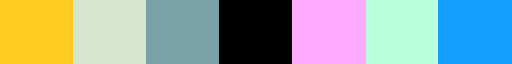

In [24]:
p.update_legend_cmap(update_legend=True)[1]

## Display one object (attribute = 'lithology')

In [25]:
bh = 1
p.boreholes_3d[bh]._components

[Component({'lithology': 'sable', 'pollutant': 'vi'}),
 Component({'lithology': 'argile', 'pollutant': 'vr'}),
 Component({'lithology': 'marne', 'pollutant': 'vi'}),
 Component({'lithology': 'charbon', 'pollutant': 'vr'}),
 Component({'lithology': 'dolomie', 'pollutant': 'vi'})]

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:311: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect1 = patches.Rectangle((0, 0),


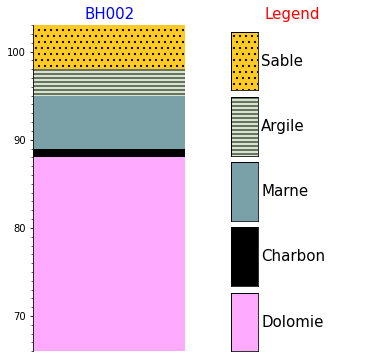

In [26]:
p.boreholes_3d[bh].plot2d()

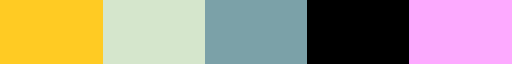

In [27]:
p.boreholes_3d[bh].cmap

In [28]:
sargs = dict(title='test', title_font_size=30, label_font_size=12, n_labels=0,
             fmt="%.2f", font_family="arial", color='k',interactive=True, 
             vertical=True, italic=True, shadow=False,)

In [29]:
bh=1
p.boreholes_3d[bh].plot3d(show_legend=True, scalar_bar_args=sargs)

Colormap computing ...
{1.4: 'sable', 2.2: 'argile', 3.0: 'marne', 3.8000000000000003: 'charbon', 4.6: 'dolomie'}
[array([1.        , 0.79607843, 0.1372549 , 1.        ]), array([0.83529412, 0.90196078, 0.8       , 1.        ]), array([0.48235294, 0.63137255, 0.65882353, 1.        ]), array([0., 0., 0., 1.]), array([0.99215686, 0.66666667, 1.        , 1.        ])]


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Plot with another attribute

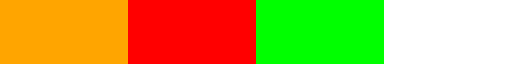

In [30]:
p.update_legend_cmap(repr_attribute='pollutant')[1] #legend=lithology_memoris, update_legend=False)[0]

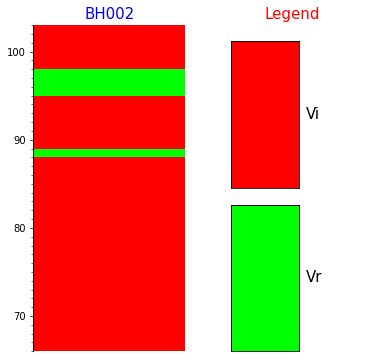

In [31]:
p.boreholes_3d[bh].plot2d(repr_attribute='pollutant', repr_legend=pollutant_memoris)

In [32]:
p.boreholes_3d[bh].plot3d(repr_attribute='pollutant', 
                          repr_legend=pollutant_memoris, 
                          show_legend=True)

Colormap computing ...
{1.4: 'vi', 2.2: 'vr'}
[array([1., 0., 0., 1.]), array([0., 1., 0., 1.]), array([1., 0., 0., 1.]), array([0., 1., 0., 1.]), array([1., 0., 0., 1.])]


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Display project boreholes

### Boreholes in 3D using X3D for interaction within the notebook